In [101]:
import keras
from keras.applications import Xception
from keras.applications import imagenet_utils
from keras.preprocessing.image import img_to_array, load_img
from keras.applications.inception_v3 import preprocess_input
import numpy as np
import cv2

In [102]:
img = load_img('Desktop//ball.jpeg')
img = img.resize((299,299))
img = img_to_array(img)

In [103]:
img.shape

(299, 299, 3)

In [104]:
img = np.expand_dims(img,axis=0)
img.shape

(1, 299, 299, 3)

In [62]:
#img2 = cv2.imread('Desktop//ball.jpeg')
#img2.shape

(340, 340, 3)

In [26]:
#img2 = cv2.resize(img2,(224,224)) # correct one
#img2.shape

(224, 224, 3)

In [27]:
#img2 = np.array(img2) # since only one image, better to use np.expand_dims
#img2.shape

(224, 224, 3)

In [105]:
img1 = imagenet_utils.preprocess_input(img) # either this or below for preprocessing the input image

In [106]:
img2 = preprocess_input(img) # for preprocessing

In [107]:
model = Xception(weights='imagenet')

91889664/91884032 [==============================] - 888s 10us/step


In [108]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_5[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

In [109]:
pred1 = model.predict(img1)
apred1 = imagenet_utils.decode_predictions(pred1) # for decoding the prediction and relate to imagenet classes
print(apred1[0][0][1])
print(apred1[0][0][2]*100)

basketball
97.73789644241333


In [110]:
pred2 = model.predict(img2)
apred2 = imagenet_utils.decode_predictions(pred2) # for decoding the prediction and relate to imagenet classes
print(apred2[0][0][1])
print(apred2[0][0][2]*100)

basketball
99.66589212417603


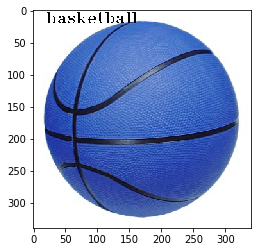

In [112]:
import matplotlib.pyplot as plt
disp_img = cv2.imread('Desktop//ball.jpeg')
cv2.putText(disp_img,apred1[0][0][1], (20,20), cv2.FONT_HERSHEY_TRIPLEX,0.8,(0,0,0))
plt.imshow(disp_img)